In [1]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scikitplot as skplt

In [2]:
data = {
    "label": [
        "p", "p", "n", "p", "p", "p", "n", "n", "p", "n",
        "p", "n", "p", "n", "n", "n", "p", "n", "p", "n",
    ],
    "score": [
        .90, .80, .70, .60, .55, .54, .53, .52, .51, .505,
        .40, .39, .38, .37, .36, .35, .34, .33, .30, .10,
    ]
}


In [3]:
fpr, tpr, threshold = metrics.roc_curve(
    y_true=data["label"], 
    y_score=data["score"],
    pos_label="p",
)

fpr, tpr, threshold

(array([0. , 0. , 0. , 0.1, 0.1, 0.3, 0.3, 0.4, 0.4, 0.5, 0.5, 0.8, 0.8,
        0.9, 0.9, 1. ]),
 array([0. , 0.1, 0.2, 0.2, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9,
        0.9, 1. , 1. ]),
 array([1.9  , 0.9  , 0.8  , 0.7  , 0.54 , 0.52 , 0.51 , 0.505, 0.4  ,
        0.39 , 0.38 , 0.35 , 0.34 , 0.33 , 0.3  , 0.1  ]))

In [4]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.6799999999999999

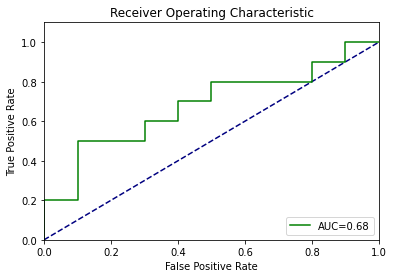

In [5]:
plt.title("Receiver Operating Characteristic")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0, 1])
plt.ylim([0, 1.1])

plt.plot(fpr, tpr, "g", label=f"AUC={roc_auc:.2f}") # draw the ROC in green
plt.legend(loc="lower right")

plt.show()

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

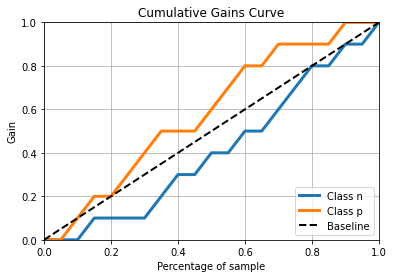

In [6]:
label = np.array(data["label"])

threshold = 0.5
probabilities = pd.DataFrame({
    "score": data["score"],
    "class": ["p" if s > 0.5 else "n" for s in data["score"]]
})


skplt.metrics.plot_cumulative_gain(
    y_true=label, 
    y_probas=probabilities,
)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

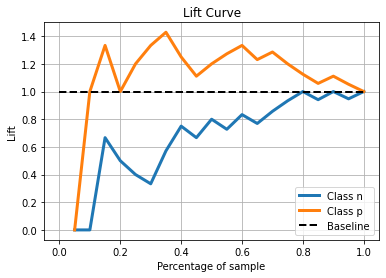

In [7]:
skplt.metrics.plot_lift_curve(
    y_true=label, 
    y_probas=probabilities,
)

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

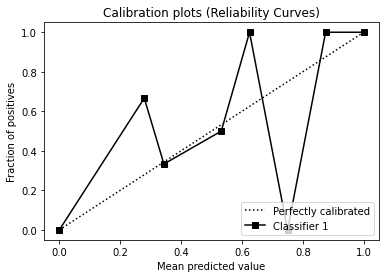

In [8]:
skplt.metrics.plot_calibration_curve(
    y_true=label, 
    probas_list=[data["score"]],
)